In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/aashgohil/Market_Mx_Model/main/Advertising.csv")


In [19]:
print(df.columns)
df.head()


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Dropping the Unnamed:0 Column


In [20]:
df = df.drop(['Unnamed: 0'],axis=1)

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# EDA


Building a correlation matrix, to analyze relationship between the Advertising Channels and Sales

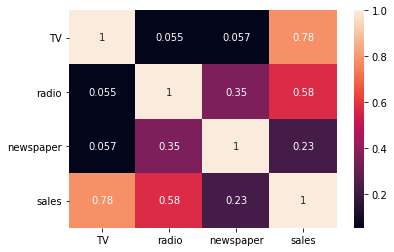

In [24]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,)

There’s a strong correlation between TV and sales (0.78), a moderate correlation between radio and sales (0.58), and a low correlation between newspaper and sales (0.23)

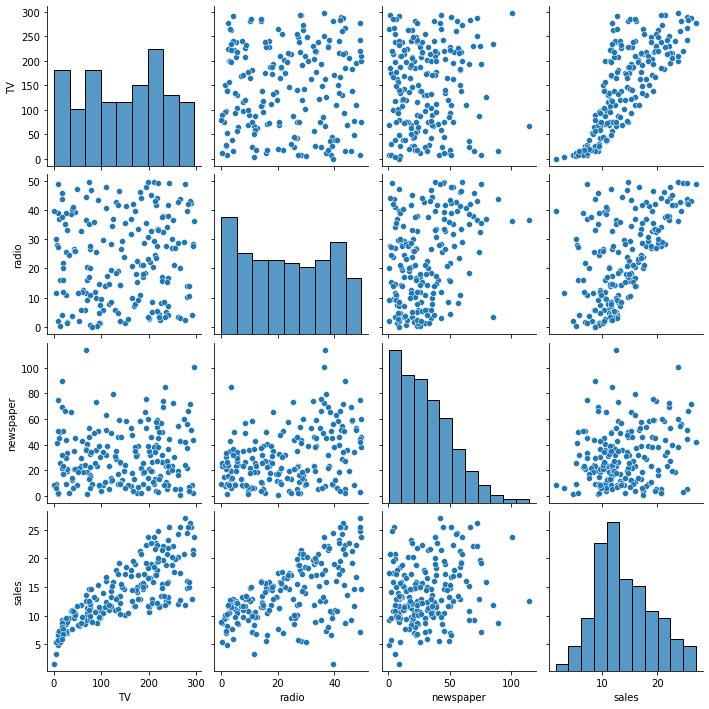

In [25]:
sns.pairplot(df)


Creating a pairplot to further analyse corealation.

A similar result to the correlation matrix, appear to be a strong relationship between TV and sales, less for radio, and even lesser for newspapers.


Creating a random forest model to find out the importance of each feature.


In [27]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

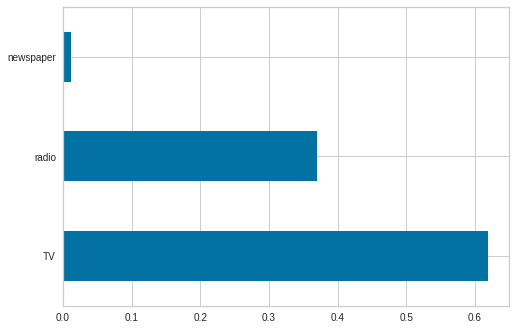

In [46]:
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

TV is the most important, then radio, and lastly newspaper.

# Linear Regression Model


In [48]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
predictions = lm.predict(X_test)

Plotting Model, to check actual vs predicted


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


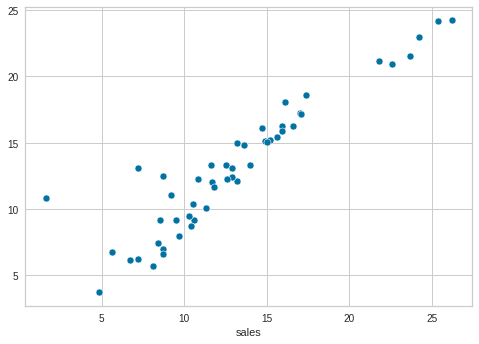

In [53]:
sns.scatterplot(y_test, predictions)

In [72]:
y1 = y_test.reset_index()
y1 = y1['sales']

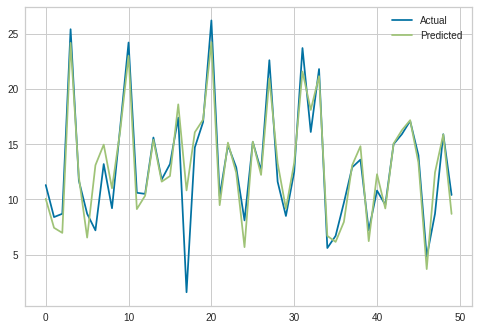

In [74]:

plt.plot(y1, label = 'Actual')
plt.plot(predictions, label = 'Predicted')
plt.legend()
plt.show()

Checking LR Metrics


In [75]:
import numpy as np
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 1.3000320919235455
MSE : 4.012497522917099
RMSE : 2.0031219440955406
